# Load Profile Forecasting

In [40]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv("./data_oct20.csv", parse_dates = ["date"])
data.head(2)

,L2_react,L2,L,L_react,NS4949_export,L2_active_import,PV,Wind_speed,Temperature,Global_irradiance,Plane_irradiance,Module_temp,Bat_current,Bat_energy,Battery_SOC,Battery_voltage,Battery_charge,Battery_discharge,date,L1
0,-1.672253,8.917166,105.823796,-1.330095,103.75,7.5,0.003709,5.0,1.885714,0.017964,0.018072,0.000171,-0.181818,762.249603,69.649998,751.549988,0.000042,0.000031,2020-10-01 01:00:00,96.906629
1,-1.672253,8.917166,105.823796,-1.330095,103.75,7.5,0.003709,5.0,1.885714,0.017964,0.018072,0.000171,-0.181818,762.249603,69.649998,751.549988,0.000042,0.000031,2020-10-01 01:01:00,96.906629


In [73]:
data["L1"] = data["L"] - data["L2"]

data.head(6)

,L2_react,L2,L,L_react,NS4949_export,L2_active_import,PV,Wind_speed,Temperature,Global_irradiance,Plane_irradiance,Module_temp,Bat_current,Bat_energy,Battery_SOC,Battery_voltage,Battery_charge,Battery_discharge,date,L1
0,-1.672253,8.917166,105.823796,-1.330095,103.75,7.500,0.003709,5.00,1.885714,0.017964,0.018072,0.000171,-0.181818,762.249603,69.649998,751.549988,0.000042,0.000031,2020-10-01 01:00:00,96.906629
1,-1.672253,8.917166,105.823796,-1.330095,103.75,7.500,0.003709,5.00,1.885714,0.017964,0.018072,0.000171,-0.181818,762.249603,69.649998,751.549988,0.000042,0.000031,2020-10-01 01:01:00,96.906629
2,-1.716742,7.229899,102.129644,-1.932434,120.00,9.375,0.007418,4.50,3.771429,0.035928,0.036145,0.000342,0.555556,761.702393,69.599998,751.557129,0.000083,0.000063,2020-10-01 01:02:00,94.899745
3,-1.881816,7.073435,100.159958,-2.689998,106.25,5.625,0.011128,4.00,5.657143,0.053892,0.054217,0.000514,2.875000,762.249603,69.649998,751.514282,0.000125,0.000094,2020-10-01 01:03:00,93.086522
4,-1.930388,7.101530,103.150754,-1.578558,98.75,9.375,0.014837,3.00,7.542857,0.071856,0.072289,0.000685,-0.285714,762.249603,69.649998,751.528564,0.000166,0.000125,2020-10-01 01:04:00,96.049224
5,-1.836128,7.033921,104.297171,-0.160664,120.00,5.625,0.018546,3.25,9.428571,0.089820,0.090361,0.000856,-0.750000,762.432007,69.666664,751.549988,0.000208,0.000157,2020-10-01 01:05:00,97.263249


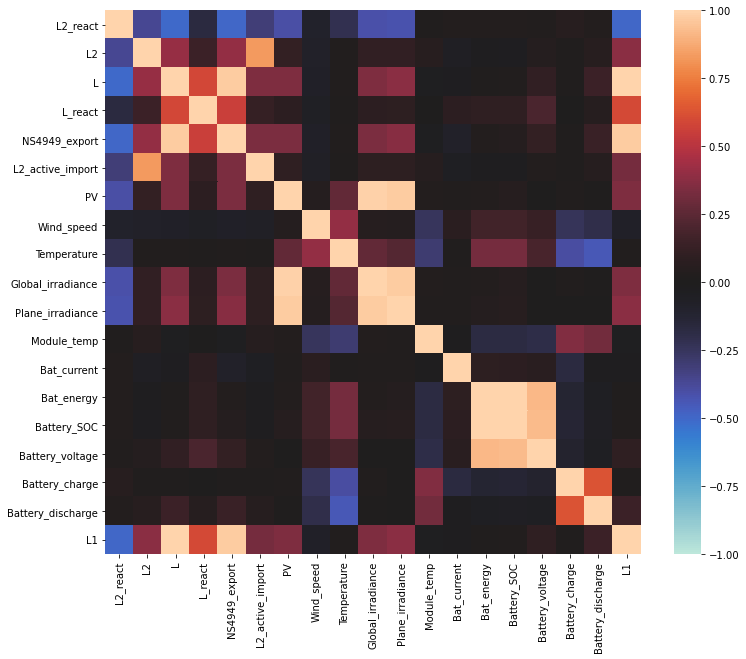

In [62]:
plt.figure(figsize = (12, 10))
corr = data.corr()

sn.heatmap(corr, vmin = -1, vmax = 1, center = 0)
plt.show()

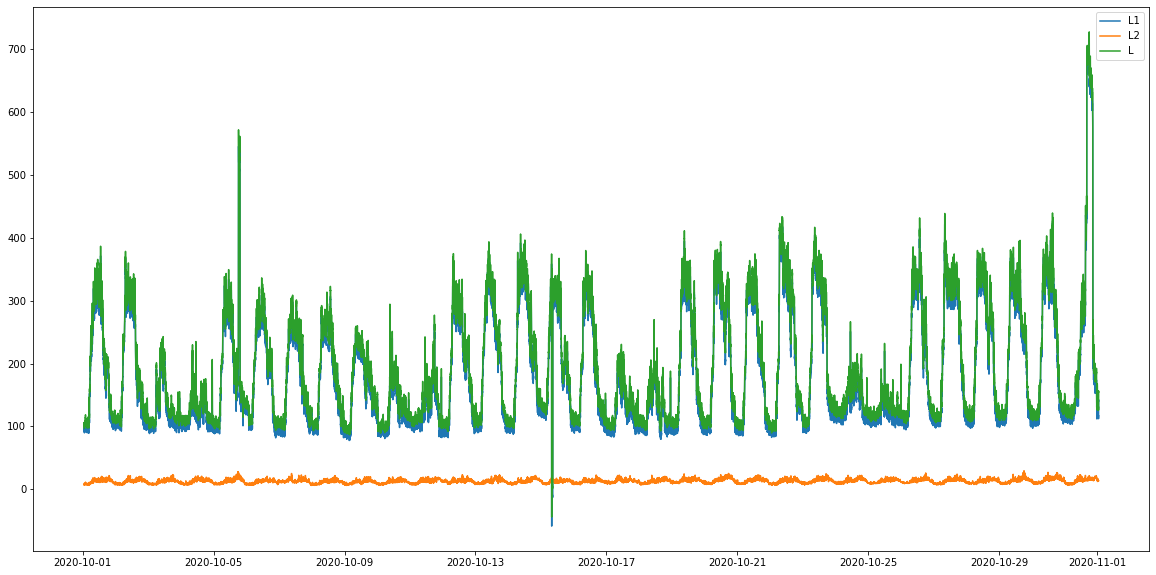

In [72]:
def plot_series_in_df(df, series):
    t = df.date
    for serie in series:
        plt.plot(t, df[serie].values)
        
    plt.legend(series)

plt.figure(figsize = (20, 10))
plot_series_in_df(data, ["L1", "L2", "L"])

In [91]:
def get_average_day(df, column, sample_period = 1):
    """
    Extracts the days and returns the average day
    """
    
    num_datapoints = 24*60/sample_period
    days = []
    grouped = df.groupby([df.date.dt.floor('d')], as_index = False)
    for day, group in grouped:
        if len(group) != 1440:
            continue
        days.append(group[column].values)
        
    return np.asarray(days).mean(axis = 0).shape
        
    
get_average_day(data, "L1")
    

(1440,)


In [ ]:
import numpy as np
import pandas as pd

class Loads:
    def __init__(self, N, filename, column, actions_per_hour = 6):
        self.N = N
        self.filename = filename
        self.resolution = 60/actions_per_hour
        self.column = column
        
        self.df = pd.read_csv(self.filename, parse_dates = ["date"])
        
        self.mean = self.get_average_day()
        
        
    def get_average_day(self):
        """
        Extracts the days and returns the average day
        """

        num_datapoints = 24*60/self.resolution
        days = []
        grouped = df.groupby([df.date.dt.floor('d')], as_index = False)
        for day, group in grouped:
            if len(group) != num_datapoints:
                continue
            days.append(group[column].values)

        return np.asarray(days).mean(axis = 0)
    
    def get_prediction_mean(self, step):
        """
        Returns the mean for the next N steps
        """
        return self.mean[step: step + self.N]
    
    def get_scaled_mean(self, measurement, step):
        """
        Returns the mean for the next N steps, scaled to current measurement
        """
        return (measurement / self.mean[step])* self.mean[step: step + self.N]

In [99]:
loads = data.filter(["date", "L", "L1", "L2"]).iloc[::10].reset_index(drop = True)
loads.to_csv("../src/data/loads.csv",index = False)